# Hackathon 

# Importing the required Libraries

In [98]:
import pandas as pd 
import numpy as np
import seaborn as sns


# Reading the dataset

In [99]:
df=pd.read_csv(r'C:\Users\TOSHIBA\Desktop\Data.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [101]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [102]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [103]:
df.x2.value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [104]:
df=df.fillna(0)

In [105]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [106]:
x=df.loc[:,['x1','x2']]
y=df[['y']]

In [107]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler
standardized_data = Scaler().fit_transform(x)
print(standardized_data.shape)

(2227, 2)


In [108]:
features=['x1','x2']

In [109]:
df2 = pd.DataFrame(standardized_data,columns = features)
df2

,x1,x2
0,-1.530731,-0.029940
1,-1.286759,-0.029946
2,-1.676536,-0.029943
3,-1.468420,-0.029945
4,-1.530731,-0.029940
...,...,...
2222,1.383259,-0.029949
2223,1.355456,-0.029948
2224,1.209017,-0.029944
2225,1.119290,-0.029952


In [125]:
df.x2.value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-121.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [111]:
df.y.value_counts()

0    1242
1     985
Name: y, dtype: int64

# Visualizing the data

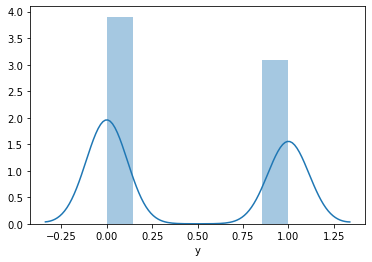

In [127]:
sns.distplot(df['y'],hist=True)

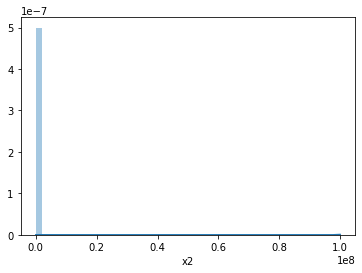

In [122]:
sns.distplot(df['x2'],hist=True)

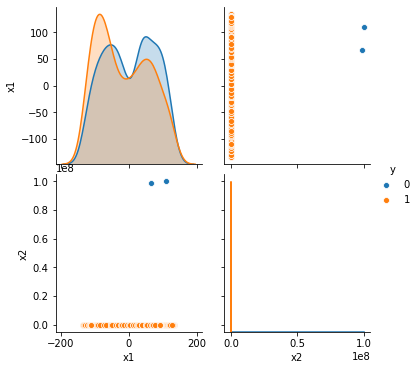

In [112]:
sns.pairplot(df,hue='y')

In [113]:
x=df2.loc[:,['x1','x2']]

# Train Test Split

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Training

In [116]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    SVC(kernel='rbf')
]

In [117]:
for classifier in Classifiers:
    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.5919282511210763
Accuracy of DecisionTreeClassifier is 0.9372197309417041
Accuracy of KNeighborsClassifier is 0.5695067264573991
Accuracy of SVC is 0.5426008968609866
Accuracy of SVC is 0.5829596412556054


# Hyperpatameter Tuning


# Logitic regression

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = GridSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))

    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print('scoring {}'.format(i))

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
scoring accuracy
0.5919282511210763
Best parameters set found on train set:
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
scoring precision
0.5948275862068966
Best parameters set found on train set:
{'C': 2, 'penalty': 'l2'}
LogisticRegression(C=2)
scoring recall
0.3382352941176471


# Decision Tree :

In [126]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'max_depth':[2,3,4,6,7,8,9,25]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(max_depth=7)

0.9506726457399103
Best parameters set found on train set:
{'max_depth': 9}
DecisionTreeClassifier(max_depth=9)

0.9633507853403142
Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(max_depth=7)

0.9558823529411765


# Knearest neighbor:

In [120]:
import warnings
warnings.filterwarnings('ignore')
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]

evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 3, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=3)

0.5762331838565022
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)

0.5869565217391305
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1, p=1)

0.5245098039215687


<h3>Since the relationship between the features and outcome is non linear, machine learning algorithms like SVM, Logistic, Knn fail with less accuracy score while desicion tree algorithm manages to split the data with certain values in features with accuracy score of 96.3% at maxdepth of 9  <h3>